In [1]:
# 기본 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Password:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 은행 마케팅 캠페인 분석

2008년부터 2010년까지 진행된 포르투갈 은행의 마케팅 캠페인 데이터를 분석하여, 고객이 **정기 예금**에 가입할 가능성을 예측하고 이를 통해 **마케팅 전략의 효율성을 극대화**하는 것이 목표

- 고객 특성을 바탕으로 정기 예금 가입 여부를 예측할 수 있는 분류 모델 개발
- 캠페인 성과에 영향을 주는 핵심 요인 식별
- 데이터 기반 마케팅 전략 수립

1. **데이터 전처리**  
- 결측치 및 이상값 처리


2. **탐색적 데이터 분석 (EDA) 및 가설 검증**  
- 고객 특성과 가입률 간의 관계 시각화
- 분석 가설 수립 및 통계 기반 검증

4. **모델링**
- 범주형 변수 인코딩 및 불필요한 변수 제거, 파생변수 생성
- 결정 트리 및 앙상블 기법 기반의 분류 모델 개발
- 모델 성능 비교 및 변수 중요도 분석

4. **결론 및 개선 방안 도출**
- 가입 가능성이 높은 고객군 도출
- 효율적인 마케팅 전략 제안

In [ ]:
# 데이터 불러오기
# data = pd.read_csv('/content/drive/MyDrive/코드잇스프린트/data/bank-additional-full.csv', sep=';', encoding='utf-8')

data = pd.read_csv('./bank-additional-full.csv')

# 1. 데이터 전처리

1.1 데이터 정보
행 41188, 열 21




In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
data.shape

(41188, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# 범주형 카테고리 변환
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data[categorical_cols] = data[categorical_cols].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 1.2 이상치 처리

1. age(나이)

최소: 17, 중앙값: 38, 최대: 98
- 70대 이상 고객 존재 가능성 있다고 판단

2. duration(마지막 통화시간)

최대값: 4918초, 중앙값:180초, 3Q: 319초
- 이상치값은 전체데이터의 약 7%로 확인
- duration_log 값 추가
- 이상치 플래그 변수 추가

3. campaign(현재 캠페인 중 연락 횟수)
- 최대값: 56회, 중앙값: 2회, 3Q: 3회

4. pdays(이전 캠페인 후 지난 일수)

최대갑: 999, 중앙값: 999, 3Q: 999

- 대부분 이전 캠페인 동안 연락한 적이 없음
- 999 비율: 96.32%
- 'previous_contact' 추가 (이전에 연락한적 있으면 1, 없으면(값이 999) 0

5. previous(이전 캠페인 동안의 연락 횟수)

최대값: 7
- 대부분이 캠페인에 참여한 적이 없기 때문에 이상치로 보기 어려움


6. cons.conf.idx(소비자 신뢰자수)
- 이상치 약 1% 확인
- 소비자 신뢰자 수는 중요 지표가 될 수 있기에 삭제 또는 대체하지 않고 그대로 유지

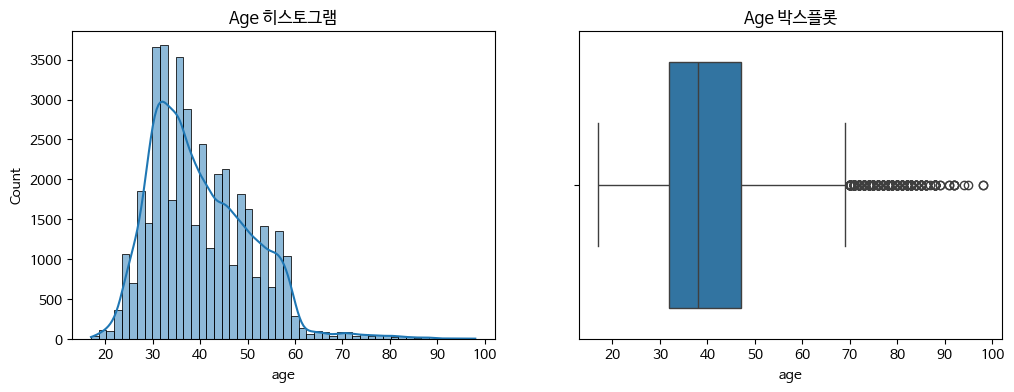

[age] 이상치 기준 상한: 69.50
[age] 이상치 개수: 469


NameError: name 'lower_bound' is not defined

In [ ]:
# age
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], bins=50, kde=True)
plt.title('Age 히스토그램')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['age'])
plt.title('Age 박스플롯')
plt.show()

Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"[age] 이상치 기준 상한: {upper_bound:.2f}")
print(f"[age] 이상치 개수: {(data['age'] > upper_bound).sum()}")

outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print(f"전체 데이터 대비 이상치 비율: {len(outliers) / len(data) * 100:.2f}%")


In [ ]:
# duration
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['duration'], bins=30)
plt.title('duration 히스토그램')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['duration'])
plt.title('duration 박스플롯')

plt.tight_layout()
plt.show()

Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"[duration] 이상치 기준 상한: {upper_bound:.2f}")
print(f"[duration] 이상치 개수: {(data['age'] > upper_bound).sum()}")

outliers = data[(data['duration'] < lower_bound) | (data['duration'] > upper_bound)]
print(f"전체 데이터 대비 이상치 비율: {len(outliers) / len(data) * 100:.2f}%")


In [ ]:
# duration_log 값 및 이상치 플래그 변수 추가

data['duration_log'] = np.log1p(data['duration'])

# 이상치 플래그 변수 추가
data['duration_outlier'] = (data['duration'] < lower_bound) | (data['duration'] > upper_bound)

In [ ]:
# campain

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(data['campaign'], bins=50, kde=True)
plt.title('Campaign Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['campaign'])
plt.title('Campaign Boxplot')
plt.show()

Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"[campaign] 이상치 기준 상한: {upper_bound:.2f}")
print(f"[campaign] 이상치 개수: {(data['campaign'] > upper_bound).sum()}")

outliers = data[(data['campaign'] < lower_bound) | (data['campaign'] > upper_bound)]
print(f"전체 데이터 대비 이상치 비율: {len(outliers) / len(data) * 100:.2f}%")

[pdays] 999 비율: 96.32%


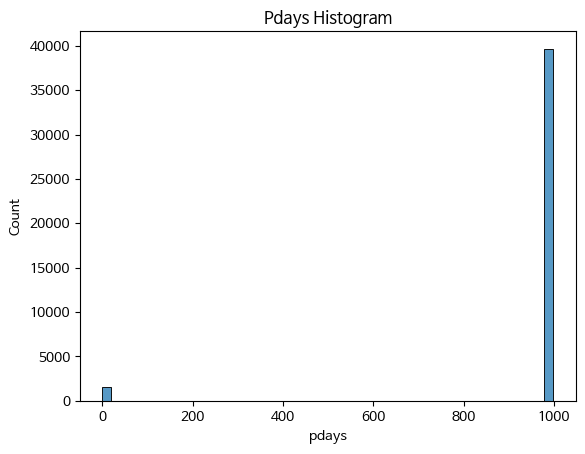

pdays가 999가 아닌 데이터 개수: 1515


In [ ]:
# pdays

print(f"[pdays] 999 비율: {(data['pdays'] == 999).mean()*100:.2f}%")
sns.histplot(data['pdays'], bins=50)
plt.title('Pdays Histogram')
plt.show()

num_not_999 = (data['pdays'] != 999).sum()
print(f"pdays가 999가 아닌 데이터 개수: {num_not_999}")

In [ ]:
# pdays 처리
# 연략한적 있으면 1 없으면(값이 999) 0
data['previous_contact'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)

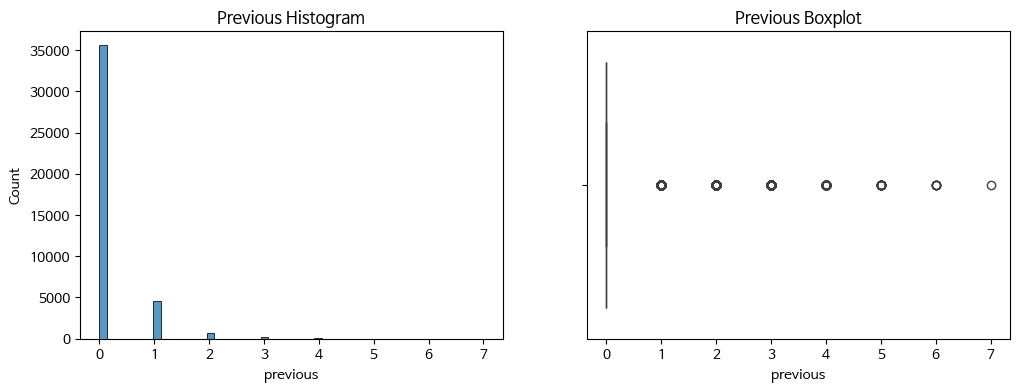

[previous] 이상치 기준 상한: 0.00
[previous] 이상치 개수: 5625


NameError: name 'lower_bound' is not defined

In [ ]:
# previous

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.histplot(data['previous'], bins=50)
plt.title('Previous Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['previous'])
plt.title('Previous Boxplot')
plt.show()

Q1 = data['previous'].quantile(0.25)
Q3 = data['previous'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
print(f"[previous] 이상치 기준 상한: {upper_bound:.2f}")
print(f"[previous] 이상치 개수: {(data['previous'] > upper_bound).sum()}")


outliers = data[(data['previous'] < lower_bound) | (data['previous'] > upper_bound)]
print(f"전체 데이터 대비 이상치 비율: {len(outliers) / len(data) * 100:.2f}%")

In [ ]:
cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(15, len(cols) * 3))

for i, col in enumerate(cols):
    # Histogram
    plt.subplot(len(cols), 2, 2*i + 1)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'{col} Histogram')

    # Boxplot
    plt.subplot(len(cols), 2, 2*i + 2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

In [ ]:
# cons.conf.idx.Boxplot

Q1 = data['cons.conf.idx'].quantile(0.25)
Q3 = data['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['cons.conf.idx'] < lower_bound) | (data['cons.conf.idx'] > upper_bound)]
print(outliers[['cons.conf.idx']])

# 2. EDA